Data Pre-Processing Step

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sklearn as sk

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [ ]:
df = pd.read_csv('./sample_data/Life Expectancy Data.csv')
df.drop(['Country', 'Year', 'GDP', 'Population'], axis=1, inplace=True)
df = df.dropna(subset=['Life expectancy '])
df2=df
df = pd.get_dummies(df, columns=['Status'], drop_first=False)

y = df['Life expectancy ']
X = df.drop('Life expectancy ', axis=1)
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

In [ ]:
y_min = np.min(y)
y_max = np.max(y)
y_range = y_max - y_min
y_mean = np.mean(y)
y_median = np.median(y)
y_std = np.std(y)

print(f"Minimum of y: {y_min}")
print(f"Maximum of y: {y_max}")
print(f"Range of y: {y_range}")
print(f"Mean of y: {y_mean}")
print(f"Median of y: {y_median}")
print(f"Standard Deviation of y: {y_std}")

Minimum of y: 36.3
Maximum of y: 89.0
Range of y: 52.7
Mean of y: 69.22493169398908
Median of y: 72.1
Standard Deviation of y: 9.522241005447492


Data Visualization

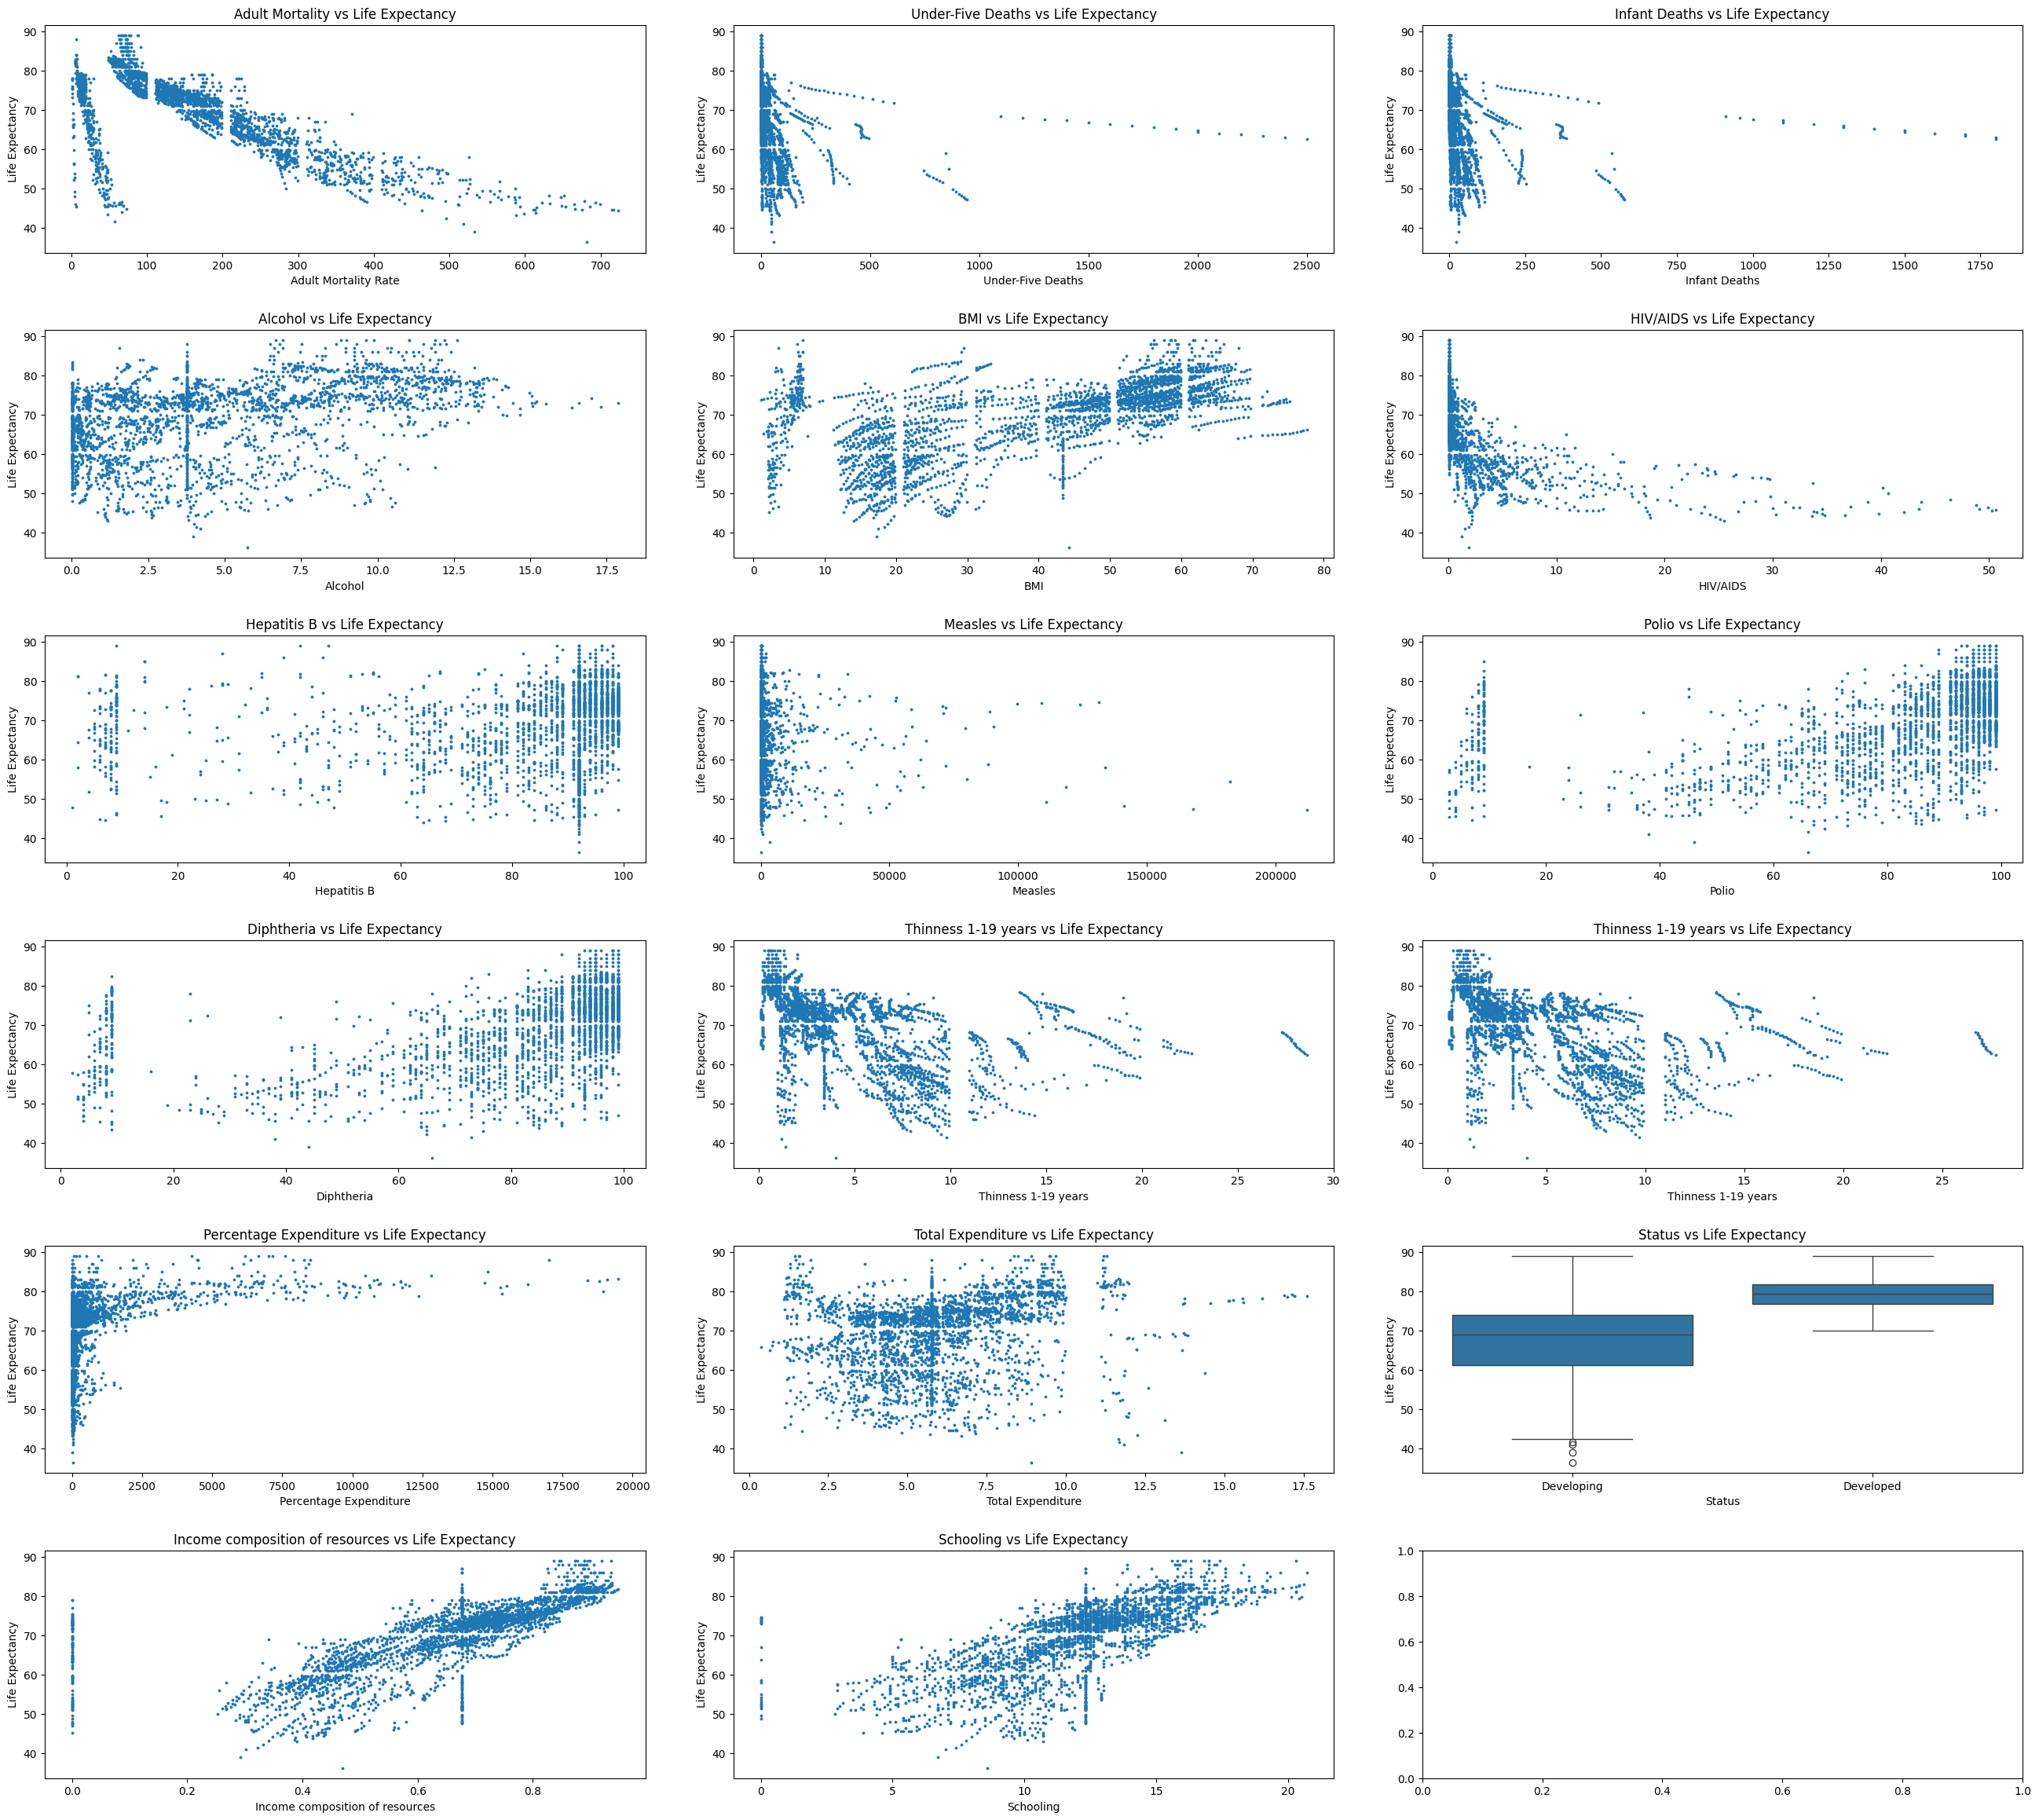

Largest Positive Correlation: 0.5371619797039479 (Feature: Schooling)
Largest Positive Correlation: -0.5268867191509006 (Feature: Adult Mortality)


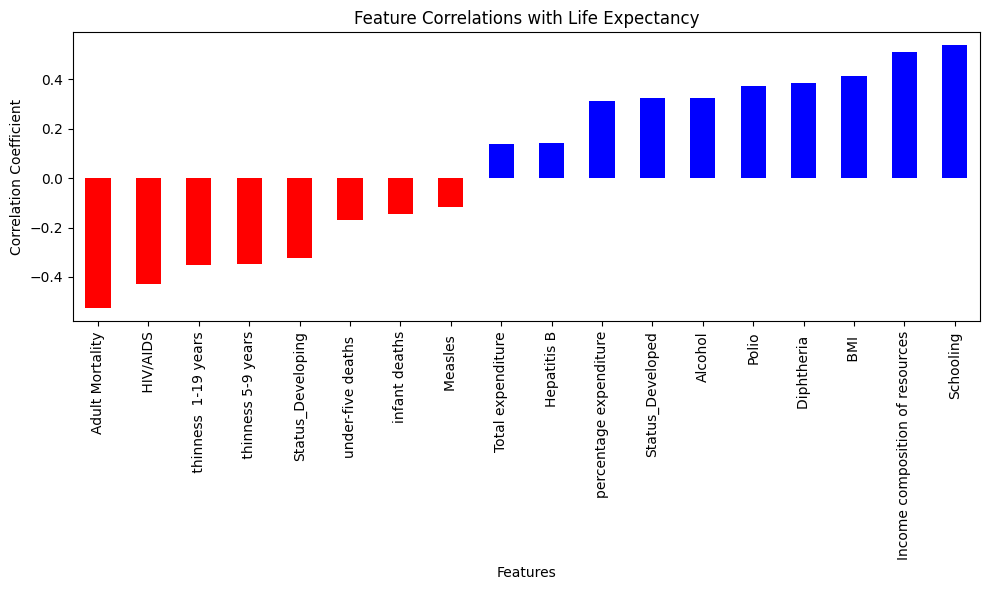

In [ ]:
X_df = pd.DataFrame(X, columns=df.drop('Life expectancy ', axis=1).columns)
data_with_target = pd.concat([X_df, y], axis=1)

column_names = X_df.columns

# Plot each variable against life expectancy
# 'Income composition of resources', 'Schooling',
# 'Status_Developed', 'Status_Developing'
figure, axis = plt.subplots(6, 3, figsize=(27,24))
figure.tight_layout(pad=5.0)
# Adult Mortality
axis[0,0].scatter(X_df['Adult Mortality'], y, s=3)
axis[0,0].set_title("Adult Mortality vs Life Expectancy")
axis[0,0].set(xlabel="Adult Mortality Rate", ylabel="Life Expectancy")
# Under-Five Deaths
axis[0,1].scatter(X_df['under-five deaths '], y, s=3)
axis[0,1].set_title("Under-Five Deaths vs Life Expectancy")
axis[0,1].set(xlabel="Under-Five Deaths", ylabel="Life Expectancy")
# Infant Deaths
axis[0,2].scatter(X_df['infant deaths'], y, s=3)
axis[0,2].set_title("Infant Deaths vs Life Expectancy")
axis[0,2].set(xlabel="Infant Deaths", ylabel="Life Expectancy")
# Alcohol
axis[1,0].scatter(X_df['Alcohol'], y, s=3)
axis[1,0].set_title("Alcohol vs Life Expectancy")
axis[1,0].set(xlabel="Alcohol", ylabel="Life Expectancy")
# BMI
axis[1,1].scatter(X_df[' BMI '], y, s=3)
axis[1,1].set_title("BMI vs Life Expectancy")
axis[1,1].set(xlabel="BMI", ylabel="Life Expectancy")
# HIV/AIDS
axis[1,2].scatter(X_df[' HIV/AIDS'], y, s=3)
axis[1,2].set_title("HIV/AIDS vs Life Expectancy")
axis[1,2].set(xlabel="HIV/AIDS", ylabel="Life Expectancy")
# Hepatitis B
axis[2,0].scatter(X_df['Hepatitis B'], y, s=3)
axis[2,0].set_title("Hepatitis B vs Life Expectancy")
axis[2,0].set(xlabel="Hepatitis B", ylabel="Life Expectancy")
# Measles
axis[2,1].scatter(X_df['Measles '], y, s=3)
axis[2,1].set_title("Measles vs Life Expectancy")
axis[2,1].set(xlabel="Measles", ylabel="Life Expectancy")
# Polio
axis[2,2].scatter(X_df['Polio'], y, s=3)
axis[2,2].set_title("Polio vs Life Expectancy")
axis[2,2].set(xlabel="Polio", ylabel="Life Expectancy")
# Diphtheria
axis[3,0].scatter(X_df['Diphtheria '], y, s=3)
axis[3,0].set_title("Diphtheria vs Life Expectancy")
axis[3,0].set(xlabel="Diphtheria", ylabel="Life Expectancy")
# Thinness 5-9 years
axis[3,1].scatter(X_df[' thinness 5-9 years'], y, s=3)
axis[3,1].set_title("Thinness 1-19 years vs Life Expectancy")
axis[3,1].set(xlabel="Thinness 1-19 years", ylabel="Life Expectancy")
# Thinness 1-19 years
axis[3,2].scatter(X_df[' thinness  1-19 years'], y, s=3)
axis[3,2].set_title("Thinness 1-19 years vs Life Expectancy")
axis[3,2].set(xlabel="Thinness 1-19 years", ylabel="Life Expectancy")
# Percentage Expenditure
axis[4,0].scatter(X_df['percentage expenditure'], y, s=3)
axis[4,0].set_title("Percentage Expenditure vs Life Expectancy")
axis[4,0].set(xlabel="Percentage Expenditure", ylabel="Life Expectancy")
# Total Expenditure
axis[4,1].scatter(X_df['Total expenditure'], y, s=3)
axis[4,1].set_title("Total Expenditure vs Life Expectancy")
axis[4,1].set(xlabel="Total Expenditure", ylabel="Life Expectancy")
# Status
sns.boxplot(ax=axis[4, 2], data=df2, x='Status', y='Life expectancy ')
axis[4,2].set_title("Status vs Life Expectancy")
axis[4,2].set(xlabel="Status", ylabel="Life Expectancy")
# Income composition of resources
axis[5,0].scatter(X_df['Income composition of resources'], y, s=3)
axis[5,0].set_title("Income composition of resources vs Life Expectancy")
axis[5,0].set(xlabel="Income composition of resources", ylabel="Life Expectancy")
# Schooling
axis[5,1].scatter(X_df['Schooling'], y, s=3)
axis[5,1].set_title("Schooling vs Life Expectancy")
axis[5,1].set(xlabel="Schooling", ylabel="Life Expectancy")
plt.show()

# print(X_df.columns.tolist())

# Compute correlation with the target variable
correlation = data_with_target.corr()['Life expectancy '].sort_values()

# Separate positive and negative correlations
positive_corr = correlation[correlation > 0].sort_values(ascending=False)
negative_corr = correlation[correlation < 0].sort_values()

# Get the second largest positive correlation and its feature name
# The largest positive correlation is Life Expectancy which is not counted
second_largest_positive_feature = positive_corr.index[1]  # Feature name
second_largest_positive_value = positive_corr.iloc[1]     # Correlation value
# Get the largest positive correlation and its feature name
smallest_negative_feature = negative_corr.idxmin()  # Feature name
smallest_negative_value = negative_corr.min()       # Correlation value


# Print the result
print(f"Largest Positive Correlation: {second_largest_positive_value} (Feature: {second_largest_positive_feature})")
print(f"Largest Positive Correlation: {smallest_negative_value} (Feature: {smallest_negative_feature})")



# Plot correlations
plt.figure(figsize=(10, 6))
correlation.drop('Life expectancy ').sort_values().plot(kind='bar', color=['red' if val < 0 else 'blue' for val in correlation.drop('Life expectancy ')])
plt.title('Feature Correlations with Life Expectancy')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Linear Model

In [ ]:
linear_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

linear_pipeline.fit(X, y)
lin_mse = -cross_val_score(linear_pipeline, X, y, cv=10, scoring='neg_mean_squared_error').mean()
lin_rmse = np.sqrt(lin_mse)

print(f"Linear RMSE = {lin_rmse}")

Linear RMSE = 4.355262989814198


Random Forest

In [ ]:
rf = RandomForestRegressor()

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'log2']
}

rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid_search.fit(X, y)

print("Best Parameters:", rf_grid_search.best_params_)

Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [ ]:
rf_mse = -rf_grid_search.best_score_
rf_rmse = np.sqrt(rf_mse)

print(f"Random Forest RMSE: {rf_rmse}")

Random Forest RMSE: 2.752340186489408


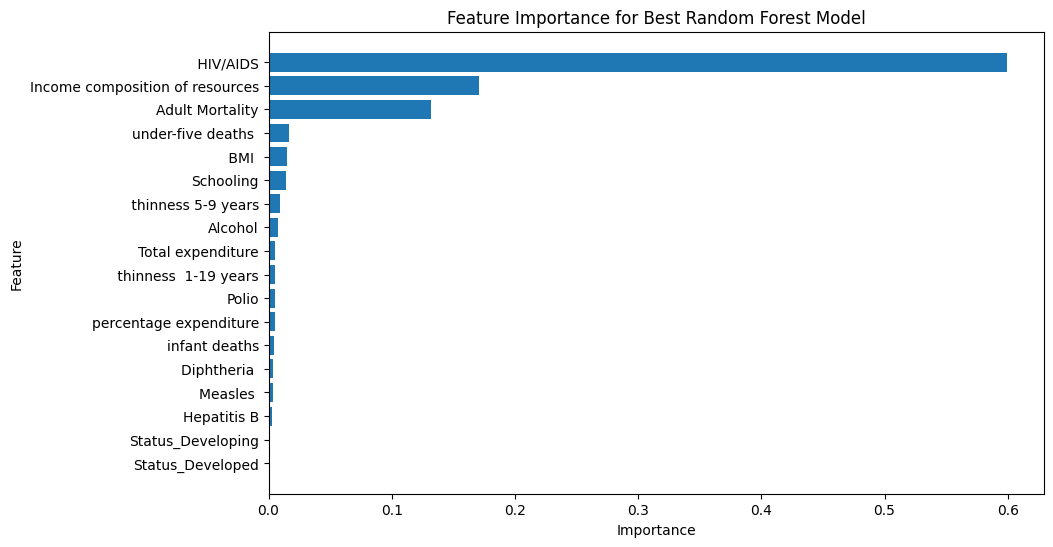

In [ ]:
best_rf_model = rf_grid_search.best_estimator_
importance = best_rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_df.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Best Random Forest Model')
plt.gca().invert_yaxis()
plt.show()

XGBoost

In [ ]:
xgb = xgb.XGBRegressor(objective='reg:squarederror')

xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_grid_search = GridSearchCV(estimator=xgb, param_grid=xgb_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
xgb_grid_search.fit(X, y)

print("Best Parameters:", xgb_grid_search.best_params_)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 200, 'subsample': 1.0}


In [ ]:
xgb_mse = -xgb_grid_search.best_score_
xgb_rmse = np.sqrt(xgb_mse)

print(f"XGBoost RMSE: {xgb_rmse}")

XGBoost RMSE: 2.6591749437528547


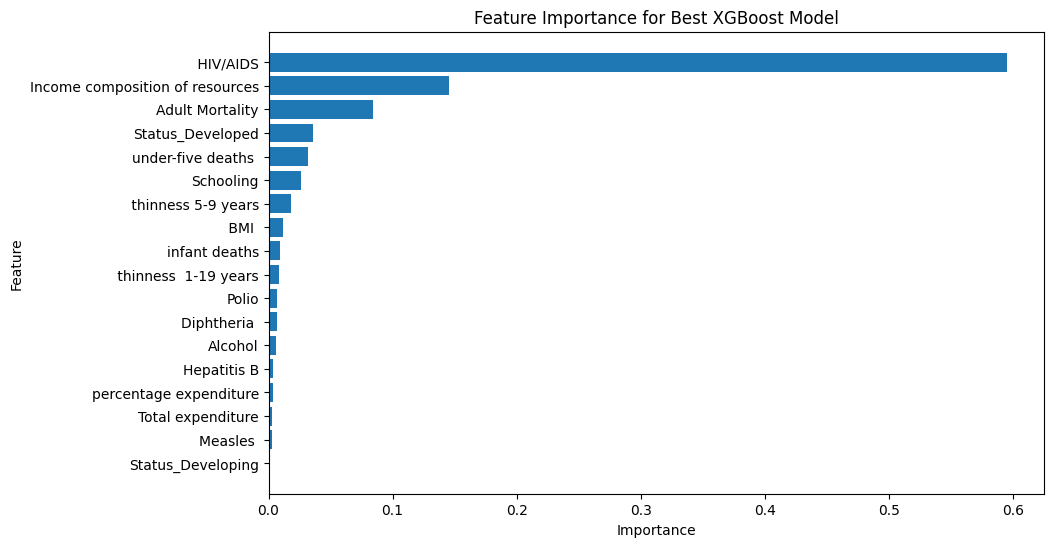

In [ ]:
best_xgb_model = xgb_grid_search.best_estimator_
importance = best_xgb_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_df.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Best XGBoost Model')
plt.gca().invert_yaxis()
plt.show()

Model Comparison

<function matplotlib.pyplot.show(close=None, block=None)>

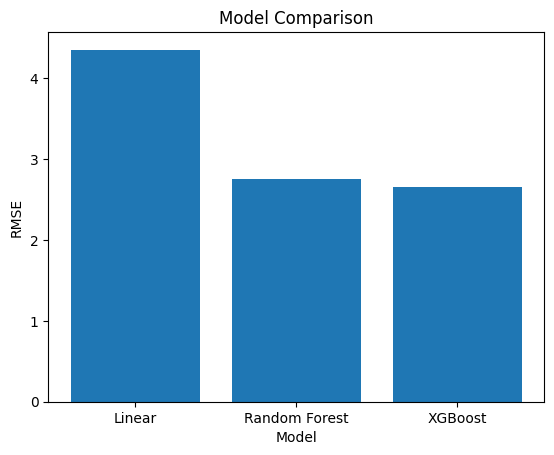

In [ ]:
plt.bar(['Linear', 'Random Forest', 'XGBoost'], [lin_rmse, rf_rmse, xgb_rmse])
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('Model Comparison')
plt.show